<a href="https://colab.research.google.com/github/derrionrobinson/Machine-Learning-Practice/blob/main/Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
from sklearn.datasets import load_breast_cancer

Predictions: [0 0 0 0 0 0 0 0 1]

Confusion Matrix:
 [[84 15]
 [20 35]]

Model Performance Metrics:
Accuracy: 0.7727272727272727
Precision: 0.7
Recall: 0.6363636363636364
F1 Score: 0.6666666666666666


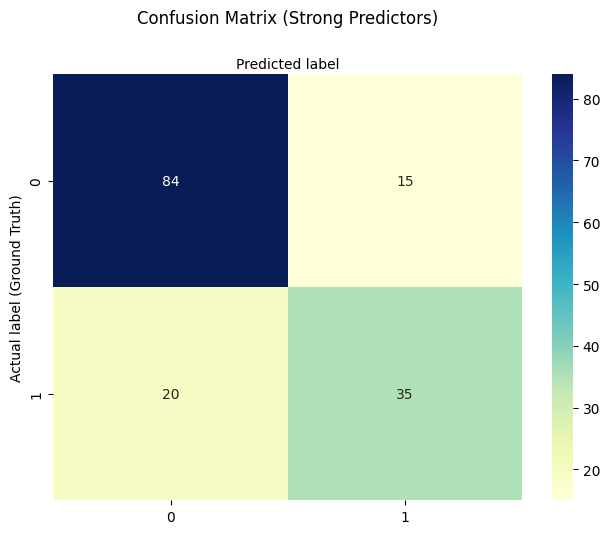

In [51]:
#Problem 1

url ='https://raw.githubusercontent.com/derrionrobinson/Machine-Learning-Practice/refs/heads/main/diabetes.csv'
diabetes = pd.read_csv(url)
diabetes.head()

# Select only strong predictors
top_features = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']
explanatory_variables = diabetes[top_features]
ground_truth = diabetes['Outcome']

# Split into training and validation set
explanatory_train, explanatory_test, ground_truth_train, ground_truth_test = train_test_split(
    explanatory_variables, ground_truth, test_size=0.20, random_state=42
)

# Standardize explanatory variables
scaler = StandardScaler()
explanatory_train = scaler.fit_transform(explanatory_train)
explanatory_test = scaler.transform(explanatory_test)

# Logistic Regression model
log_reg_model = LogisticRegression(random_state=0
)
log_reg_model.fit(explanatory_train, ground_truth_train)

# Predictions
ground_truth_pred = log_reg_model.predict(explanatory_test)
print("Predictions:", ground_truth_pred[0:9])

# Confusion Matrix
conf_matrix = confusion_matrix(ground_truth_test, ground_truth_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Model Performance Metrics
print("\nModel Performance Metrics:")
print("Accuracy:", metrics.accuracy_score(ground_truth_test, ground_truth_pred))
print("Precision:", metrics.precision_score(ground_truth_test, ground_truth_pred))
print("Recall:", metrics.recall_score(ground_truth_test, ground_truth_pred))
print("F1 Score:", metrics.f1_score(ground_truth_test, ground_truth_pred))

# Plot
class_labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

#Confusion Matrix Output
sns.heatmap(pd.DataFrame(conf_matrix),
            annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix (Strong Predictors)', y=1.1)
plt.ylabel('Actual label (Ground Truth)')
plt.xlabel('Predicted label')
plt.show()




Predictions: [0 1 1 1 1 1 1 1 1]

Confusion Matrix:
 [[45  2]
 [ 2 65]]

Model Performance Metrics:
Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433
F1 Score: 0.9701492537313433


/tmp/ipython-input-677340543.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_df['ground_truth'].replace(0, 'Benign', inplace=True)


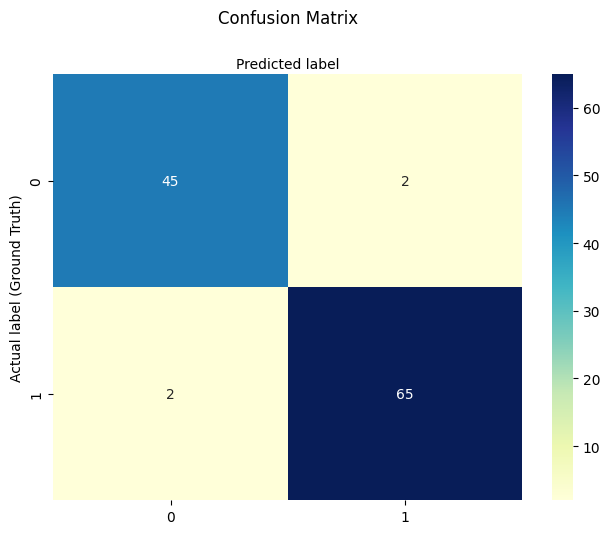

In [50]:
#Problem 2(a)

# Load dataset
cancer_data = load_breast_cancer()
feature_values = cancer_data.data
feature_names = cancer_data.feature_names
target_values = cancer_data.target

# Create DataFrame for explanatory variables
explanatory_df = pd.DataFrame(feature_values, columns=feature_names)

# Combine features and ground truth
ground_truth = np.reshape(target_values, (569, 1))
combined_data = np.concatenate([feature_values, ground_truth], axis=1)

# Build complete DataFrame
columns_with_label = np.append(feature_names, 'ground_truth')
dataset_df = pd.DataFrame(combined_data, columns=columns_with_label)

# Replace numeric labels with class names
dataset_df['ground_truth'].replace(0, 'Benign', inplace=True)
dataset_df['ground_truth'].replace(1, 'Malignant', inplace=True)

# Define explanatory variables (X) and ground truth (y)
explanatory_variables = explanatory_df.iloc[:, 0:31].values
ground_truth = target_values

# Split into training and testing sets
explanatory_train, explanatory_test, ground_truth_train, ground_truth_test = train_test_split(
    explanatory_variables, ground_truth, test_size=0.20, random_state=0
)

# Standardize explanatory variables
scaler = StandardScaler()
explanatory_train = scaler.fit_transform(explanatory_train)
explanatory_test = scaler.transform(explanatory_test)

# Logistic Regression model
log_reg_model = LogisticRegression(random_state=0)
log_reg_model.fit(explanatory_train, ground_truth_train)

# Predictions
ground_truth_pred = log_reg_model.predict(explanatory_test)
print("Predictions:", ground_truth_pred[0:9])

# Confusion Matrix
conf_matrix = confusion_matrix(ground_truth_test, ground_truth_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Metrics
print("\nModel Performance Metrics:")
print("Accuracy:", metrics.accuracy_score(ground_truth_test, ground_truth_pred))
print("Precision:", metrics.precision_score(ground_truth_test, ground_truth_pred))
print("Recall:", metrics.recall_score(ground_truth_test, ground_truth_pred))
print("F1 Score:", metrics.f1_score(ground_truth_test, ground_truth_pred))

# Visualization
class_labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Confusion Matrix Output
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label (Ground Truth)')
plt.xlabel('Predicted label')
plt.show()


Predictions: [0 1 1 1 1 1 1 1 1]

Confusion Matrix:
 [[45  2]
 [ 2 65]]

Model Performance Metrics:
Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433
F1 Score: 0.9701492537313433


/tmp/ipython-input-2683550570.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_df['ground_truth'].replace(0, 'Benign', inplace=True)


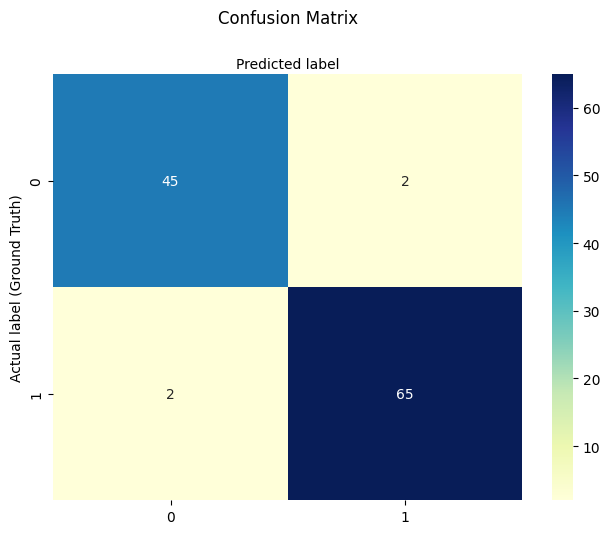

In [49]:
#Problem 2(b)

# Load dataset
cancer_data = load_breast_cancer()
feature_values = cancer_data.data
feature_names = cancer_data.feature_names
target_values = cancer_data.target

# Create DataFrame for explanatory variables
explanatory_df = pd.DataFrame(feature_values, columns=feature_names)

# Combine features and ground truth
ground_truth = np.reshape(target_values, (569, 1))
combined_data = np.concatenate([feature_values, ground_truth], axis=1)

# Build complete DataFrame
columns_with_label = np.append(feature_names, 'ground_truth')
dataset_df = pd.DataFrame(combined_data, columns=columns_with_label)

# Replace numeric labels with class names
dataset_df['ground_truth'].replace(0, 'Benign', inplace=True)
dataset_df['ground_truth'].replace(1, 'Malignant', inplace=True)

# Define explanatory variables (X) and ground truth (y)
explanatory_variables = explanatory_df.iloc[:, 0:31].values
ground_truth = target_values

# Split into training and testing sets
explanatory_train, explanatory_test, ground_truth_train, ground_truth_test = train_test_split(
    explanatory_variables, ground_truth, test_size=0.20, random_state=0
)

# Standardize explanatory variables
scaler = StandardScaler()
explanatory_train = scaler.fit_transform(explanatory_train)
explanatory_test = scaler.transform(explanatory_test)

# Logistic Regression model
log_reg_model = LogisticRegression(
    random_state=0,
    penalty='l2',   # L2 weight penalty
    C=1.0,          # Regularization strength (default)
    solver='lbfgs',
    max_iter=1000
)
log_reg_model.fit(explanatory_train, ground_truth_train)

# Predictions
ground_truth_pred = log_reg_model.predict(explanatory_test)
print("Predictions:", ground_truth_pred[0:9])

# Confusion Matrix
conf_matrix = confusion_matrix(ground_truth_test, ground_truth_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Metrics
print("\nModel Performance Metrics:")
print("Accuracy:", metrics.accuracy_score(ground_truth_test, ground_truth_pred))
print("Precision:", metrics.precision_score(ground_truth_test, ground_truth_pred))
print("Recall:", metrics.recall_score(ground_truth_test, ground_truth_pred))
print("F1 Score:", metrics.f1_score(ground_truth_test, ground_truth_pred))

# Visualization
class_labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label (Ground Truth)')
plt.xlabel('Predicted label')
plt.show()
